In [1]:
from models import TSP, CompleteGraph
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer

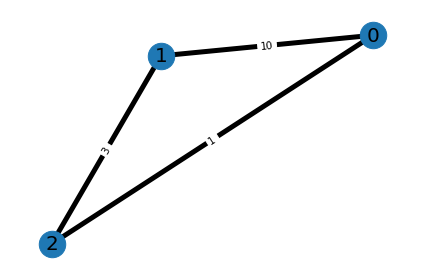

In [2]:
# Get graph
G = CompleteGraph(3)
G.draw_graph()

In [3]:
#Encode TSP with Hopfield-T-Matrix as qubo and solve exactly for comparison
tsp = TSP(G.get_graph(), A=-500, B=-500, C=-200, D=-1)
print(tsp.T[2])
qubo = tsp.to_qubo()
print(qubo.prettyprint())

exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
sol = exact.solve(qubo)
print(sol)
print(tsp.interpret(sol.x))

[[ 0.  0.  0.  0. 10. 10.  0.  1.  1.]
 [ 0.  0.  0. 10.  0. 10.  1.  0.  1.]
 [ 0.  0.  0. 10. 10.  0.  1.  1.  0.]
 [ 0. 10. 10.  0.  0.  0.  0.  3.  3.]
 [10.  0. 10.  0.  0.  0.  3.  0.  3.]
 [10. 10.  0.  0.  0.  0.  3.  3.  0.]
 [ 0.  1.  1.  0.  3.  3.  0.  0.  0.]
 [ 1.  0.  1.  3.  0.  3.  0.  0.  0.]
 [ 1.  1.  0.  3.  3.  0.  0.  0.  0.]]
Problem name: 

Minimize
  200*x0^2 + 900*x0*x1 + 900*x0*x2 + 900*x0*x3 + 410*x0*x4 + 410*x0*x5
  + 900*x0*x6 + 401*x0*x7 + 401*x0*x8 + 200*x1^2 + 900*x1*x2 + 410*x1*x3
  + 900*x1*x4 + 410*x1*x5 + 401*x1*x6 + 900*x1*x7 + 401*x1*x8 + 200*x2^2
  + 410*x2*x3 + 410*x2*x4 + 900*x2*x5 + 401*x2*x6 + 401*x2*x7 + 900*x2*x8
  + 200*x3^2 + 900*x3*x4 + 900*x3*x5 + 900*x3*x6 + 403*x3*x7 + 403*x3*x8
  + 200*x4^2 + 900*x4*x5 + 403*x4*x6 + 900*x4*x7 + 403*x4*x8 + 200*x5^2
  + 403*x5*x6 + 403*x5*x7 + 900*x5*x8 + 200*x6^2 + 900*x6*x7 + 900*x6*x8
  + 200*x7^2 + 900*x7*x8 + 200*x8^2 - 1200*x0 - 1200*x1 - 1200*x2 - 1200*x3
  - 1200*x4 - 1200*x5 - 1200*x6 - 1200

In [4]:
# Encode Qubo formulation into Ising Model Hamiltonian
H, offset = qubo.to_ising()

In [5]:
# Solve on Ising model using NumPyMinimumEigensolver
algorithm_globals.random_seed = 10598
exact_mes = NumPyMinimumEigensolver()

In [6]:
exact = MinimumEigenOptimizer(exact_mes)  # using the exact classical numpy minimum eigen solver

In [7]:
exact_result = exact.solve(qubo)
print(exact_result.prettyprint())

solution = exact_result.x

tsp.interpret(solution)

objective function value: 14.0
variable values: x0=0.0, x1=1.0, x2=0.0, x3=0.0, x4=0.0, x5=1.0, x6=1.0, x7=0.0, x8=0.0
status: SUCCESS


array([2., 0., 1.])